In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [36]:
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import seaborn as sns
import tensorflow as tf
import random
import os

CHANGE THE TICKER VALUE BELOW TO THE STOCK YOU WANT TO PREDICT THE CLOSING PRICE FOR

In [37]:
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

In [38]:
# ---- STEP 1: Pull data from Yahoo Finance ----
ticker = "CAT"  # Change to your desired stock
data = yf.download(ticker, start="2015-01-01", end="2025-12-31")

/tmp/ipykernel_37/1551770553.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2015-01-01", end="2025-12-31")
[*********************100%***********************]  1 of 1 completed


In [39]:
#SHOWS THE MOST RECENT DATA PULLED
data.tail()

Price,Close,High,Low,Open,Volume
Ticker,CAT,CAT,CAT,CAT,CAT
Date,,,,,
2025-12-15,589.760010,604.150024,587.890015,602.530029,3968600
2025-12-16,588.929993,598.659973,586.280029,590.700012,2319400
2025-12-17,561.890015,591.000000,557.460022,587.590027,3753300
2025-12-18,565.830017,574.659973,561.909973,568.500000,2191900
2025-12-19,574.460022,581.729980,570.330017,572.690002,1920334


In [40]:
data.to_excel('10Years_Stock_Data_CAT.xlsx')

In [41]:
# ---- STEP 2: Prepare data for LSTM ----
look_back = 60
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# 80% of the data for training, 20% for testing
train_size = int(len(scaled)*0.8)
train_data = scaled[:train_size]
test_data  = scaled[train_size - look_back:]   # keep look_back overlap

X_test, y_test = [], []
for i in range(look_back, len(test_data)):
    X_test.append(test_data[i-look_back:i, 0])
    y_test.append(test_data[i, 0])

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train, y_train = [], []

for i in range(look_back, len(scaled)):
    X_train.append(scaled[i-look_back:i, 0])
    y_train.append(scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [42]:
# ---- STEP 3: Build & train LSTM model ----
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mae')
model.fit(X_train, y_train, epochs=20, batch_size=120, shuffle=False)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.0289
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0839
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0617
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 0.0281
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0312
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0283
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 0.0241
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0285
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0116
Epoch 10/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0623
Epoch 11/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.0139
Epoch 12/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0545
Epoch 13/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0208
Epoch 14/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0665
Epoch 15/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0369
Epoch 16/20
23/

In [43]:
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
actual    = scaler.inverse_transform(y_test.reshape(-1,1))
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(actual, predicted))
mae  = mean_absolute_error(actual, predicted)
r2   = r2_score(actual, predicted)*100

print(f"MEAN ABSOLUTE ERROR : +/- ${mae:.2f}")
print(f"ACCURACY  : {r2:.3f} %")

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
MEAN ABSOLUTE ERROR : +/- $26.12
ACCURACY  : 87.518 %


CHANGE THE RANGE(X) NUMBER IF YOU WANT TO CHANGE THE NUMBER OF DAYS AHEAD YOU WANT TO PREDICT (CURRENTLY AT RANGE(7) FOR SEVEN DAYS)

In [44]:
# ---- STEP 4: Predict future days ----
last_sequence = scaled[-look_back:]  
future_predictions = []
#CHANGE THE NUMBER IN RANGE(X) TO THE DAYS AHEAD YOU WANT TO PREDICT
for _ in range(7):  # EX: Predict next 7 days
    seq_input = last_sequence[-look_back:]
    seq_input = seq_input.reshape((1, look_back, 1))
    next_price_scaled = model.predict(seq_input)
    future_predictions.append(next_price_scaled[0, 0])
    last_sequence = np.append(last_sequence, next_price_scaled, axis=0)

# Convert predictions back to normal prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


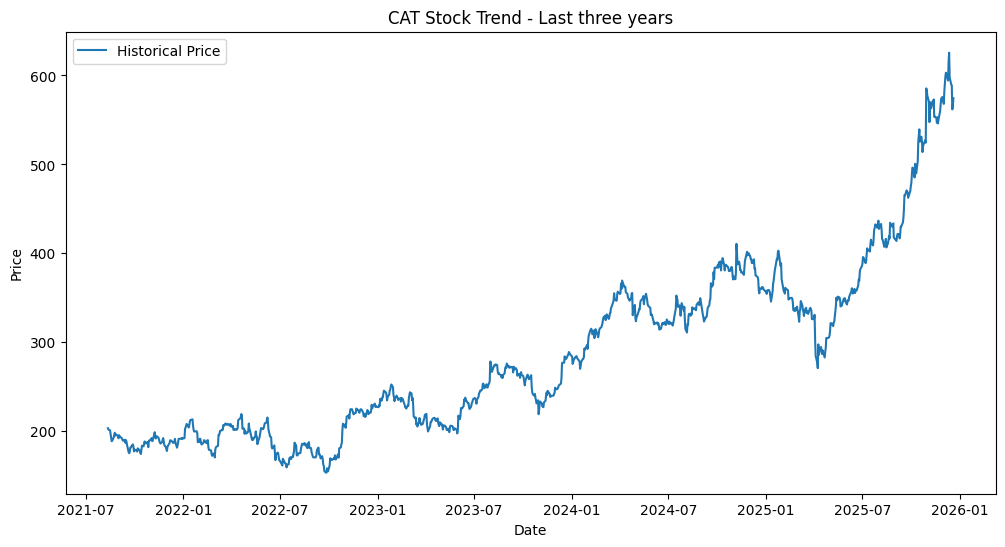

In [45]:
past_data = 1095
past_actual = data.tail(past_data)
#Plot last few years
plt.figure(figsize=(12, 6))
plt.plot(past_actual['Close'], label="Historical Price")
#future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=30)#IF YOU CHANGE THE RANGE() ABOVE YOU HAVE TO CHANGE THE PERIOD=
#plt.plot(future_dates, future_predictions, color="red", label="Predicted Future Price")
#plt.title(f"{ticker} Stock Price Prediction - Next 7 Days")
plt.title(f"{ticker} Stock Trend - Last three years")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [46]:
# Choose how many past days you want to display
history_days = 90

# Slice the data to only the last 60 days
recent_actual = data.tail(history_days)


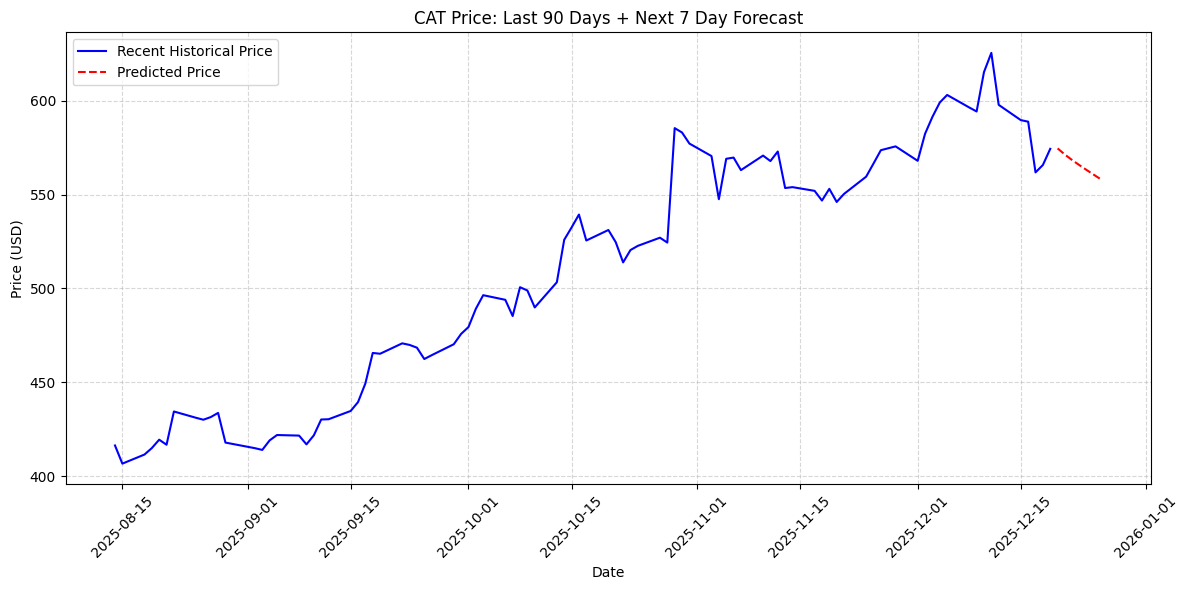

In [47]:
# ---- STEP 5: Plot ----
plt.figure(figsize=(12, 6))

# Plot the recent actual data
plt.plot(recent_actual.index,
         recent_actual['Close'],
         label="Recent Historical Price",
         color="blue")

# Plot the 30-day prediction
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=7)#IF YOU CHANGE THE RANGE() ABOVE YOU HAVE TO CHANGE THE PERIOD=
plt.plot(future_dates,
         future_predictions,
         color="red",
         linestyle="--",
         label="Predicted Price")

plt.title(f"{ticker} Price: Last {history_days} Days + Next 7 Day Forecast")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
# ---- STEP 6: Output values ----
print("Closing Price Predictions:")
for i, price in enumerate(future_predictions, 1):
    print(f"Day {i}: ${price[0]:.2f}")

Closing Price Predictions:
Day 1: $574.68
Day 2: $571.34
Day 3: $568.38
Day 4: $565.64
Day 5: $563.00
Day 6: $560.43
Day 7: $557.88
